In [28]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.1/285.1 kB 4.5 MB/s eta 0:00:006.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 8.8 MB/s eta 0:00:00m eta 0:00:010:00:01m
  Using cached Pillow-9.2.0-cp38-cp38-macosx_10_10_x86_64.whl (3.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 6.6 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.4-cp38-cp38-macosx_10_9_x86_64.whl (65 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.8/960.8 kB 9.7 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [2]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


### Load monthly mobile, desktop and cumulative files 

In [3]:
with open(os.path.join("..","data","dino_monthly_mobile_201507-202209.json"), 'r') as openfile:
    # Reading from json file
    mobile_access_modes_dict = json.load(openfile)
    
with open(os.path.join("..","data","dino_monthly_desktop_201507-202209.json"), 'r') as openfile:
    # Reading from json file
    desktop_access_modes_dict = json.load(openfile)
    
with open(os.path.join("..","data","dino_monthly_cumulative_201507-202209.json"), 'r') as openfile:
    # Reading from json file
    cumulative_access_modes_dict = json.load(openfile)

#### Create dictionary shape required for transforming to dataframe for analysis

In [4]:
mobile_access_time_series_json = []
for dino in mobile_access_modes_dict:
    for time_series_list in mobile_access_modes_dict[dino]:
        mobile_access_time_series_json.append(time_series_list)
        
desktop_access_time_series_json = []
for dino in desktop_access_modes_dict:
    for time_series_list in desktop_access_modes_dict[dino]:
        desktop_access_time_series_json.append(time_series_list)
        
cumulative_access_time_series_json = []
for dino in cumulative_access_modes_dict:
    for time_series_list in cumulative_access_modes_dict[dino]:
        cumulative_access_time_series_json.append(time_series_list)

In [5]:
mobile_time_series_df = pd.DataFrame.from_dict(mobile_access_time_series_json)
desktop_time_series_df = pd.DataFrame.from_dict(desktop_access_time_series_json)
cumulative_time_series_df = pd.DataFrame.from_dict(mobile_access_time_series_json)


### Maximum Average and Minimum Average

#### Data Prep - Creating dataframes containing data for dinosaur articles with highest and lowest average page requests for *MOBILE* and *DESKTOP* platforms

In [6]:
mobile_articles = mobile_time_series_df.groupby('article').mean().reset_index().sort_values("views",ascending=False)
mobile_articles_max_avg_dino = list(mobile_articles.article)[0]
mobile_articles_min_avg_dino = list(mobile_articles.article)[-1]

mobile_max_df = mobile_time_series_df[mobile_time_series_df["article"]
                                          .isin([mobile_articles_max_avg_dino])]
mobile_max_df["access_type"]= f"Mobile max - {mobile_articles_max_avg_dino}"
mobile_min_df = mobile_time_series_df[mobile_time_series_df["article"]
                                          .isin([mobile_articles_min_avg_dino])]
mobile_min_df["access_type"]= f"Mobile min - {mobile_articles_min_avg_dino}"

desktop_articles = desktop_time_series_df.groupby('article').mean().reset_index().sort_values("views",ascending=False)
desktop_articles_max_avg_dino = list(desktop_articles.article)[0]
desktop_articles_min_avg_dino = list(desktop_articles.article)[-1]
desktop_max_df = desktop_time_series_df[desktop_time_series_df["article"]
                                          .isin([desktop_articles_max_avg_dino])]
desktop_max_df["access_type"] = f"Desktop max - {desktop_articles_max_avg_dino}"
desktop_min_df = desktop_time_series_df[desktop_time_series_df["article"]
                                          .isin([desktop_articles_min_avg_dino])]
desktop_min_df["access_type"] = f"Desktop min - {desktop_articles_min_avg_dino}"


mobile_desktop_combined_min_max_df = pd.concat([mobile_max_df,mobile_min_df,desktop_max_df,desktop_min_df])
mobile_desktop_combined_min_max_df = mobile_desktop_combined_min_max_df[['timestamp','access_type','views']]
mobile_desktop_combined_min_max_df

/var/folders/qg/w9c0ll710y55hfpbqgzd50h00000gn/T/xpython_5111/2751374112.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mobile_articles = mobile_time_series_df.groupby('article').mean().reset_index().sort_values("views",ascending=False)
/var/folders/qg/w9c0ll710y55hfpbqgzd50h00000gn/T/xpython_5111/2751374112.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile_max_df["access_type"]= f"Mobile max - {mobile_articles_max_avg_dino}"
/var/folders/qg/w9c0ll710y55hfpbqgzd50h00000gn/T/xpython_5111/2751374112.py:10: SettingWithCopyWarning: 
A value is try

,timestamp,access_type,views
103272,2015070100,Mobile max - Tyrannosaurus,113592
103273,2015080100,Mobile max - Tyrannosaurus,61089
103274,2015090100,Mobile max - Tyrannosaurus,47233
103275,2015100100,Mobile max - Tyrannosaurus,63541
103276,2015110100,Mobile max - Tyrannosaurus,56612
...,...,...,...
45330,2022050100,Desktop min - Honghesaurus,349
45331,2022060100,Desktop min - Honghesaurus,82
45332,2022070100,Desktop min - Honghesaurus,44
45333,2022080100,Desktop min - Honghesaurus,83


#### Plot and Save

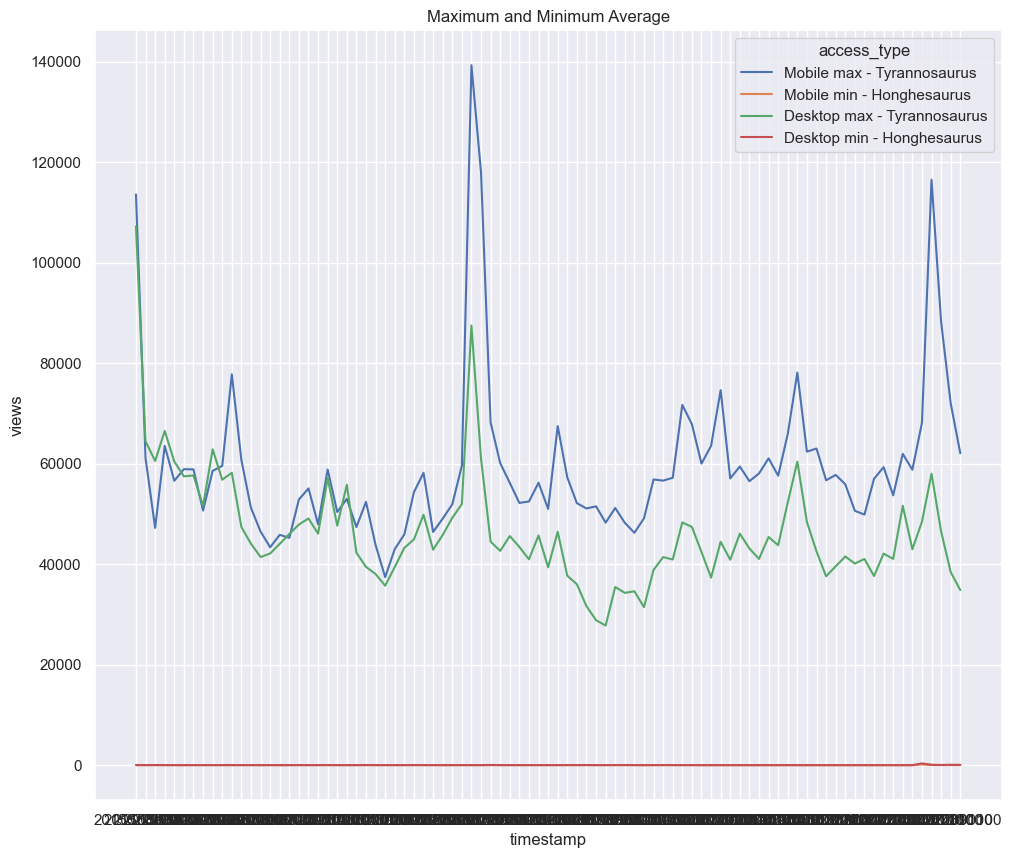

In [10]:
sns.set(rc={'figure.figsize':(11.7,10)})
min_max_avg_plot = sns.lineplot(data=mobile_desktop_combined_min_max_df, 
                                x="timestamp", y="views", hue="access_type").set_title('Maximum and Minimum Average')

min_max_avg_plot = min_max_avg_plot.get_figure()
min_max_avg_plot.savefig(os.path.join("..","results","Max_Min_Average_plot.png"))

### Top 10 Peak Page Views

In [12]:
mobile_articles = list(mobile_time_series_df.groupby('article').max().reset_index()
.sort_values("views",ascending=False)[:10]["article"])
mobile_top_10_all_time_view_df = mobile_time_series_df[mobile_time_series_df["article"]
                                          .isin(mobile_articles)]
mobile_top_10_all_time_view_df["access_type"] = "mobile"

desktop_articles = list(desktop_time_series_df.groupby('article').max().reset_index()
.sort_values("views",ascending=False)[:10]["article"])
desktop_top_10_all_time_view_df = desktop_time_series_df[desktop_time_series_df["article"]
                                          .isin(desktop_articles)]
desktop_top_10_all_time_view_df["access_type"] = "desktop"

mobile_desktop_combined_top_10_view_df  = pd.concat([mobile_top_10_all_time_view_df,
                                                desktop_top_10_all_time_view_df])
mobile_desktop_combined_top_10_view_df = mobile_desktop_combined_top_10_view_df[['timestamp','access_type','views','article']]
mobile_desktop_combined_top_10_view_df

/var/folders/qg/w9c0ll710y55hfpbqgzd50h00000gn/T/xpython_5111/3284225943.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile_top_10_all_time_view_df["access_type"] = "mobile"
/var/folders/qg/w9c0ll710y55hfpbqgzd50h00000gn/T/xpython_5111/3284225943.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desktop_top_10_all_time_view_df["access_type"] = "desktop"


,timestamp,access_type,views,article
788,2015070100,mobile,464,Achelousaurus
789,2015080100,mobile,321,Achelousaurus
790,2015090100,mobile,301,Achelousaurus
791,2015100100,mobile,322,Achelousaurus
792,2015110100,mobile,325,Achelousaurus
...,...,...,...,...
105244,2022050100,desktop,25219,Velociraptor
105245,2022060100,desktop,31520,Velociraptor
105246,2022070100,desktop,20092,Velociraptor
105247,2022080100,desktop,16691,Velociraptor


#### Plot and save

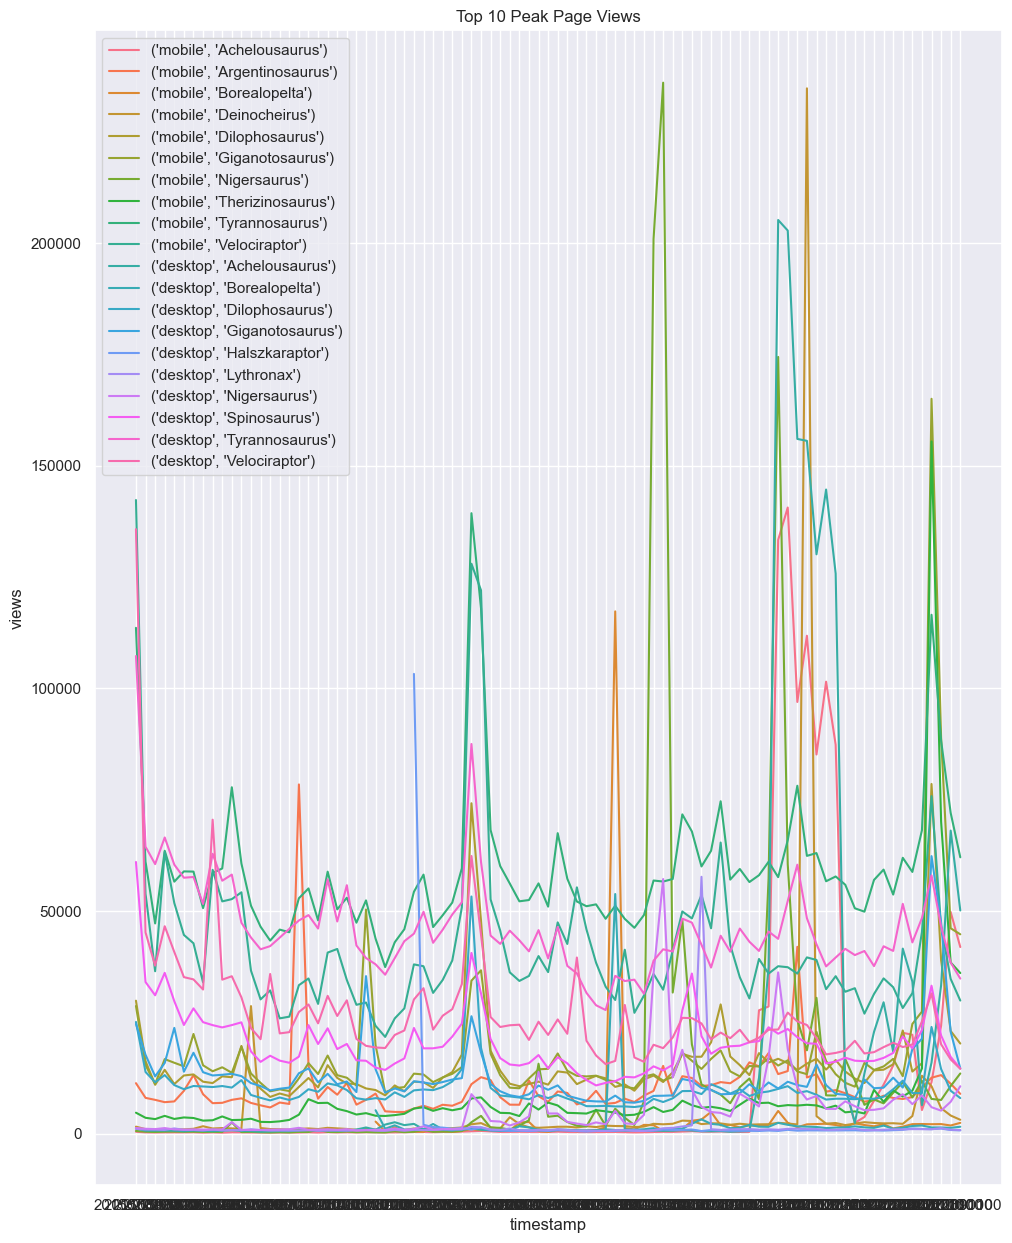

In [13]:
sns.set(rc={'figure.figsize':(11.7,15)})
min_max_avg_plot = sns.lineplot(data=mobile_desktop_combined_top_10_view_df, x="timestamp", y="views", 
                                hue=mobile_desktop_combined_top_10_view_df[["access_type","article"]].apply(tuple, axis=1))\
    .set_title('Top 10 Peak Page Views')
min_max_avg_plot = min_max_avg_plot.get_figure()
min_max_avg_plot.savefig(os.path.join("..","results","Top_10_Peak_Page_Views_plot.png"))

### Fewest Months of Data

In [14]:
mobile_articles = list(mobile_time_series_df.groupby('article').size().to_frame("months_cnt").reset_index()
.sort_values("months_cnt")[:10]["article"])
mobile_top_10_fewest_months_df = mobile_time_series_df[mobile_time_series_df["article"]
                                          .isin(mobile_articles)]
mobile_top_10_fewest_months_df["access_type"] = "mobile"

desktop_articles = list(desktop_time_series_df.groupby('article').size().to_frame("months_cnt").reset_index()
.sort_values("months_cnt")[:10]["article"])
desktop_top_10_fewest_months_df = desktop_time_series_df[desktop_time_series_df["article"]
                                          .isin(desktop_articles)]
desktop_top_10_fewest_months_df["access_type"] = "desktop"

mobile_desktop_combined_top_10_fewest_months_df  = pd.concat([mobile_top_10_fewest_months_df,
                                                desktop_top_10_fewest_months_df])
mobile_desktop_combined_top_10_fewest_months_df = mobile_desktop_combined_top_10_fewest_months_df[['timestamp','access_type','views','article']]
mobile_desktop_combined_top_10_fewest_months_df

print("\n\n\n")

print("10 Desktop articles with fewest months of available data")
print(desktop_articles,"\n\n\n\n\n\n\n\n")

print("10 Mobile articles with fewest months of available data")
print(mobile_articles)

/var/folders/qg/w9c0ll710y55hfpbqgzd50h00000gn/T/xpython_5111/1580711102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile_top_10_fewest_months_df["access_type"] = "mobile"
/var/folders/qg/w9c0ll710y55hfpbqgzd50h00000gn/T/xpython_5111/1580711102.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desktop_top_10_fewest_months_df["access_type"] = "desktop"






10 Desktop articles with fewest months of available data
['Elemgasem', 'Tuebingosaurus', 'Jakapil', 'Mbiresaurus', 'Perijasaurus', 'Bisticeratops', 'Iyuku', 'Paralitherizinosaurus', 'Bashanosaurus', 'Dzharaonyx'] 








10 Mobile articles with fewest months of available data
['Elemgasem', 'Tuebingosaurus', 'Jakapil', 'Mbiresaurus', 'Perijasaurus', 'Bisticeratops', 'Iyuku', 'Paralitherizinosaurus', 'Bashanosaurus', 'Dzharaonyx']


#### Plot and Save

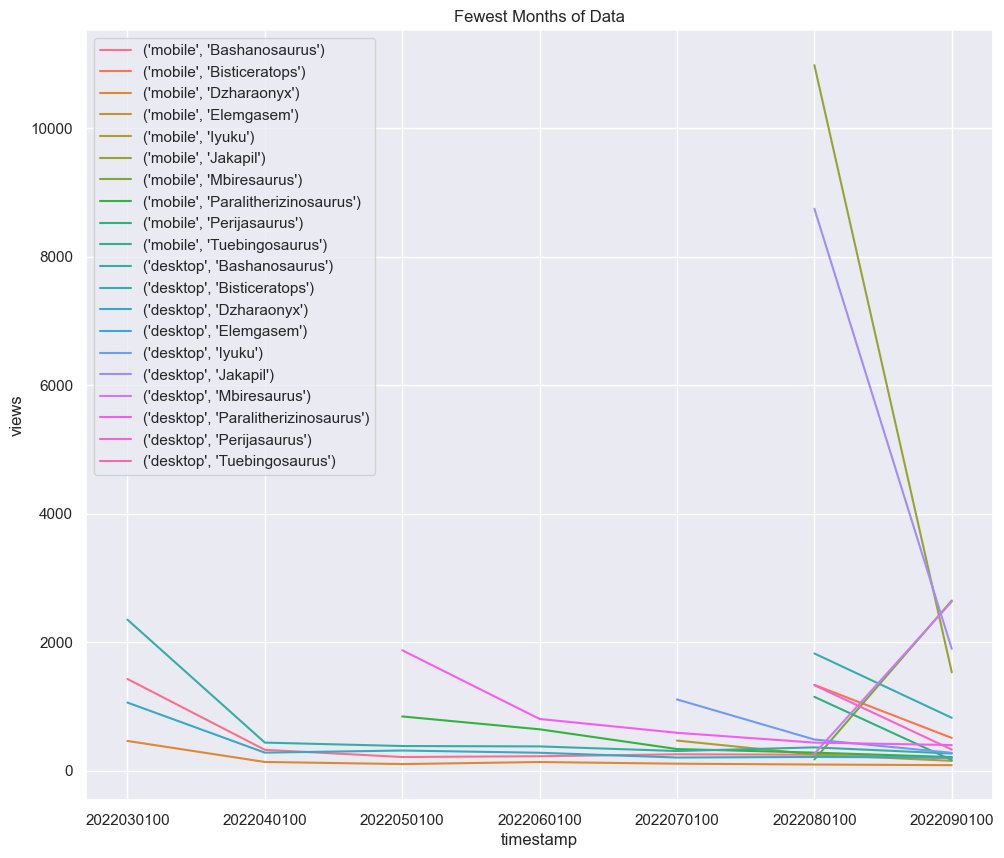

In [15]:
sns.set(rc={'figure.figsize':(11.7,10)})
fewest_months_plot = sns.lineplot(data=mobile_desktop_combined_top_10_fewest_months_df, x="timestamp", y="views", 
                                hue=mobile_desktop_combined_top_10_fewest_months_df[["access_type","article"]].apply(tuple, axis=1))\
        .set_title('Fewest Months of Data')
fewest_months_plot = fewest_months_plot.get_figure()
fewest_months_plot.savefig(os.path.join("..","results","Fewest_months_plot.png"))